# Prediction of Airline Passenger Satisfaction using R

## Problem Statement :- 
Airline Service Quality must be checked often for improvising Customers' Experience

## Objective :- 
To analyse then predict the satisfaction level of an airline passenger based on the information filled in feedback form 

## Setting Up The Environment

Installing and Importing the Required Libraries

In [2]:
# install.packages("ggplot2")
library(ggplot2) # for data visualization

Loading Of The Dataset

In [3]:
train <- read.csv("train.csv", stringsAsFactors = F) # dataset for analysis and training the ML model 
test <- read.csv("test.csv", stringsAsFactors = F) # dataset for prediction and accuracy testing
head(train, 5)

X,id,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Inflight.wifi.service,Departure.Arrival.time.convenient,...,Inflight.entertainment,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Inflight.service,Cleanliness,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0,satisfied


## Dataset Cleansing

Checking For NA Values And Replacing If Any

In [4]:
# TRAIN DATASET
train <- train[,-1] # remove extra row being created
train[is.na(train)] <- 0 # replacing NA values with 0
any(is.na(train)) # checking if any NA values left

# TEST DATASET
test <- test[,-1]
test[is.na(test)] <- 0
any(is.na(test))

[1] FALSE

[1] FALSE

Changing The Datatype Of Columns

In [5]:
# TRAIN DATASET
# converting into factor datatype
train$Gender = as.factor(train$Gender)
train$Customer.Type = as.factor(train$Customer.Type) 
train$Type.of.Travel = as.factor(train$Type.of.Travel) 
train$Class = as.factor(train$Class)
train$Inflight.wifi.service = as.factor(train$Inflight.wifi.service) 
train$Departure.Arrival.time.convenient = as.factor(train$Departure.Arrival.time.convenient) 
train$Ease.of.Online.booking = as.factor(train$Ease.of.Online.booking)
train$Gate.location = as.factor(train$Gate.location) 
train$Food.and.drink = as.factor(train$Food.and.drink)
train$Online.boarding = as.factor(train$Online.boarding)
train$Seat.comfort = as.factor(train$Seat.comfort) 
train$Inflight.entertainment = as.factor(train$Inflight.entertainment)
train$On.board.service = as.factor(train$On.board.service)
train$Leg.room.service = as.factor(train$Leg.room.service)
train$Baggage.handling = as.factor(train$Baggage.handling)
train$Checkin.service = as.factor(train$Checkin.service)
train$Inflight.service = as.factor(train$Inflight.service)
train$Cleanliness = as.factor(train$Cleanliness)
train$satisfaction = as.factor(train$satisfaction)

#TEST DATASET
test$Gender = as.factor(test$Gender) 
test$Customer.Type = as.factor(test$Customer.Type) 
test$Type.of.Travel = as.factor(test$Type.of.Travel) 
test$Class = as.factor(test$Class)
test$Inflight.wifi.service = as.factor(test$Inflight.wifi.service) 
test$Departure.Arrival.time.convenient = as.factor(test$Departure.Arrival.time.convenient) 
test$Ease.of.Online.booking = as.factor(test$Ease.of.Online.booking) 
test$Gate.location = as.factor(test$Gate.location) 
test$Food.and.drink = as.factor(test$Food.and.drink)
test$Online.boarding = as.factor(test$Online.boarding)
test$Seat.comfort = as.factor(test$Seat.comfort)
test$Inflight.entertainment = as.factor(test$Inflight.entertainment)
test$On.board.service = as.factor(test$On.board.service)
test$Leg.room.service = as.factor(test$Leg.room.service)
test$Baggage.handling = as.factor(test$Baggage.handling)
test$Checkin.service = as.factor(test$Checkin.service)
test$Inflight.service = as.factor(test$Inflight.service)
test$Cleanliness = as.factor(test$Cleanliness)
test$satisfaction = as.factor(test$satisfaction)

## Dataset Exploration

In [6]:
str(train) # gives the overall structure of the train dataframe (datatype of each column)

'data.frame':	103904 obs. of  24 variables:
 $ id                               : int  70172 5047 110028 24026 119299 111157 82113 96462 79485 65725 ...
 $ Gender                           : Factor w/ 2 levels "Female","Male": 2 2 1 1 2 1 2 1 1 2 ...
 $ Customer.Type                    : Factor w/ 2 levels "disloyal Customer",..: 2 1 2 2 2 2 2 2 2 1 ...
 $ Age                              : int  13 25 26 25 61 26 47 52 41 20 ...
 $ Type.of.Travel                   : Factor w/ 2 levels "Business travel",..: 2 1 1 1 1 2 2 1 1 1 ...
 $ Class                            : Factor w/ 3 levels "Business","Eco",..: 3 1 1 1 1 2 2 1 1 2 ...
 $ Flight.Distance                  : int  460 235 1142 562 214 1180 1276 2035 853 1061 ...
 $ Inflight.wifi.service            : Factor w/ 6 levels "0","1","2","3",..: 4 4 3 3 4 4 3 5 2 4 ...
 $ Departure.Arrival.time.convenient: Factor w/ 6 levels "0","1","2","3",..: 5 3 3 6 4 5 5 4 3 4 ...
 $ Ease.of.Online.booking           : Factor w/ 6 levels "0","1","2"

In [7]:
summary(train) # gives the statistical data about each of the dataset's columns

       id            Gender                Customer.Type        Age       
 Min.   :     1   Female:52727   disloyal Customer:18981   Min.   : 7.00  
 1st Qu.: 32534   Male  :51177   Loyal Customer   :84923   1st Qu.:27.00  
 Median : 64857                                            Median :40.00  
 Mean   : 64924                                            Mean   :39.38  
 3rd Qu.: 97368                                            3rd Qu.:51.00  
 Max.   :129880                                            Max.   :85.00  
         Type.of.Travel       Class       Flight.Distance Inflight.wifi.service
 Business travel:71655   Business:49665   Min.   :  31    0: 3103              
 Personal Travel:32249   Eco     :46745   1st Qu.: 414    1:17840              
                         Eco Plus: 7494   Median : 843    2:25830              
                                          Mean   :1189    3:25868              
                                          3rd Qu.:1743    4:19794          

In [8]:
# A table which represents the percentage of customers of each category
t.c <- table(train$Type.of.Travel, train$Class)
for(i in 1:nrow(t.c)){
    for(j in 1:ncol(t.c)){
        t.c[i, j] <- t.c[i, j] * 100 / nrow(train)
    }
}
t.c <- cbind(t.c, "Row Total"=c(sum(t.c[1,1], t.c[1,2], t.c[1,3]), sum(t.c[2,1], t.c[2,2], t.c[2,3])))
t.c <- rbind(t.c, "Column Total"=list(sum(t.c[,1]), sum(t.c[,2]), sum(t.c[,3]),  sum(t.c[,4])))

t.c

,Business,Eco,Eco Plus,Row Total
Business travel,45.72298,19.49588,3.74384,68.9627
Personal Travel,2.075955,25.49276,3.468586,31.0373
Column Total,47.79893,44.98864,7.212427,100


#### Column Description :-
`------------------------------------------------------------------------------------------------------------------------------
id                                - integer   - Passenger Identification Number                                                
Gender                            - factor    - Gender of the passengers (Female, Male)                                        
Customer.Type                     - factor    - The customer type (Loyal customer, disloyal customer)                          
Age                               - integer   - The actual age of the passengers                                               
Type.of.Travel                    - factor    - Purpose of the flight (Personal Travel, Business Travel)                       
Class                             - factor    - Travel class in the plane (Business, Eco, Eco Plus)                            
Flight.Distance                   - integer   - The flight distance of this journey                                            
Inflight.wifi.service             - factor    - Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)         
Departure.Arrival.time.convenient - factor    - Satisfaction level of Departure/Arrival time convenient                        Ease.of.Online.booking            - factor    - Satisfaction level of online booking                                           
Gate.location                     - factor    - Satisfaction level of Gate location                                            
Food.and.drink                    - factor    - Satisfaction level of Food and drink                                           
Online.boarding                   - factor    - Satisfaction level of online boarding                                          
Seat.comfort                      - factor    - Satisfaction level of Seat comfort                                             
Inflight.entertainment            - factor    - Satisfaction level of inflight entertainment                                   
On.board.service                  - factor    - Satisfaction level of On-board service                                         
Leg.room.service                  - factor    - Satisfaction level of Leg room service                                         
Baggage.handling                  - factor    - Satisfaction level of baggage handling                                         
Checkin.service                   - factor    - Satisfaction level of Check-in service                                         
Inflight.service                  - factor    - Satisfaction level of inflight service                                         
Cleanliness                       - factor    - Satisfaction level of Cleanliness                                              
Departure.Delay.in.Minutes        - integer   - Minutes delayed when departure                                                 
Arrival.Delay.in.Minutes          - integer   - Minutes delayed when Arrival                                                   
satisfaction                      - factor    - Satisfied, Dissatisfied or Netural                                             
------------------------------------------------------------------------------------------------------------------------------`

## Data Visualization

### Class Prefered By Personal and Business Trip Customers

Gathering Info Regarding The Graph

In [9]:
# unique values present in given column
unique(train$Type.of.Travel)
unique(train$Class)

[1] Personal Travel Business travel
Levels: Business travel Personal Travel

[1] Eco Plus Business Eco     
Levels: Business Eco Eco Plus

Creation Of Graph

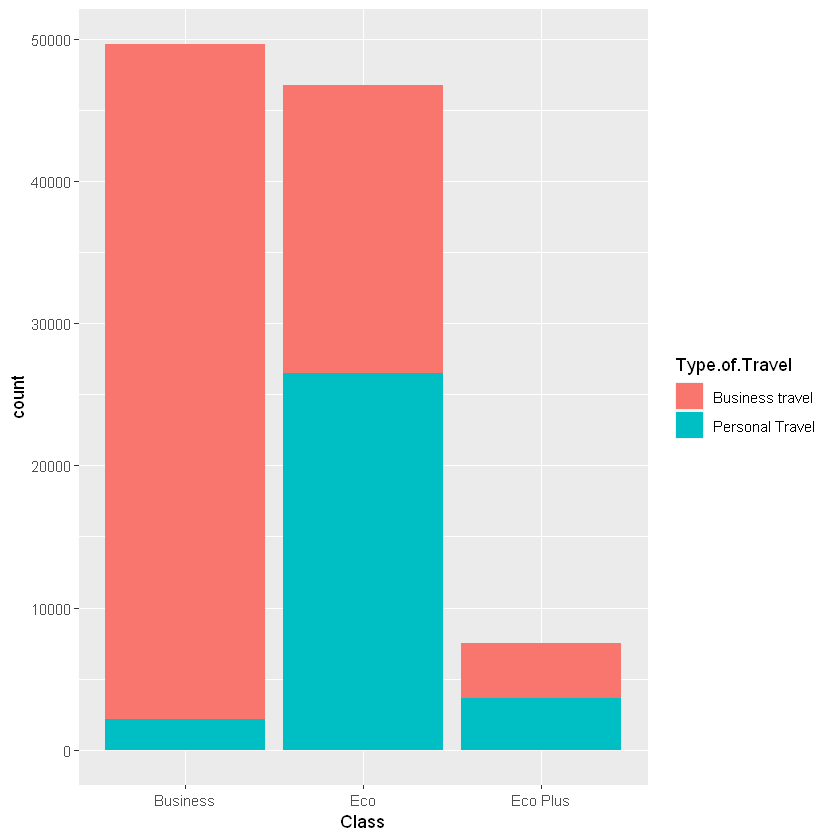

In [10]:
# a bar plot class vs type of travel
ggplot(data = train, aes(x = Class, fill = Type.of.Travel)) + geom_bar()

#### Insights :- 
From this graph we can infer that Eco Plus class is least prefered by the customers. Also we can see that people taking Business class would most likely be travelling for Business, whereas people take Eco class for both Personal and Business travel.

### Correlation Between The Delay in Arrival and Departure Time

Gathering Info Regarding The Graph

In [11]:
# calculation of mean of columns
mean(train$Departure.Delay.in.Minutes)
mean(train$Arrival.Delay.in.Minutes)

[1] 14.81562

[1] 15.13339

Creation Of Graph

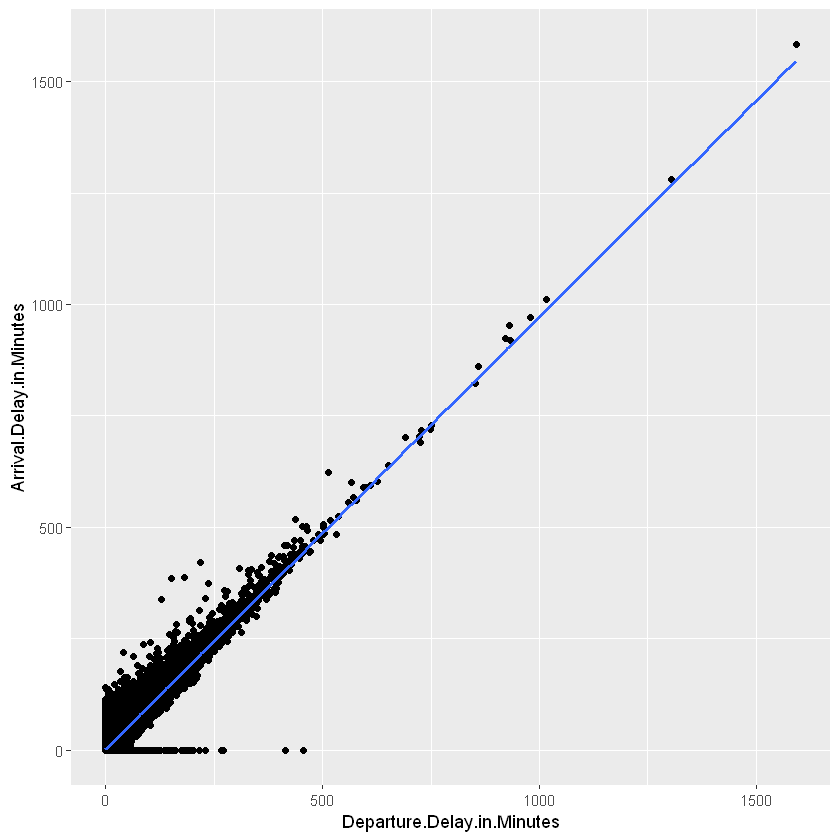

In [12]:
# graph to show correlation using scatterplot and linear regression line
graph <- ggplot(data = train, aes(x = Departure.Delay.in.Minutes, y = Arrival.Delay.in.Minutes))
graph + geom_point() + geom_smooth(method='lm', formula= y~x)

#### Insights :- 
The above graph shows the correlation between the delay in arrival and delay in departure. We can see a clear strong positive correlation between the two columns from the linear regression line.

### Satisfaction Of Different Age Categories

Gathering Info Regarding The Graph

In [13]:
length(train$Age) # number of rows
range(train$Age) # minimum and maximum value in the column
unique(train$satisfaction) # unique values in the column

[1] 103904

[1]  7 85

[1] neutral or dissatisfied satisfied              
Levels: neutral or dissatisfied satisfied

Creation Of Graph

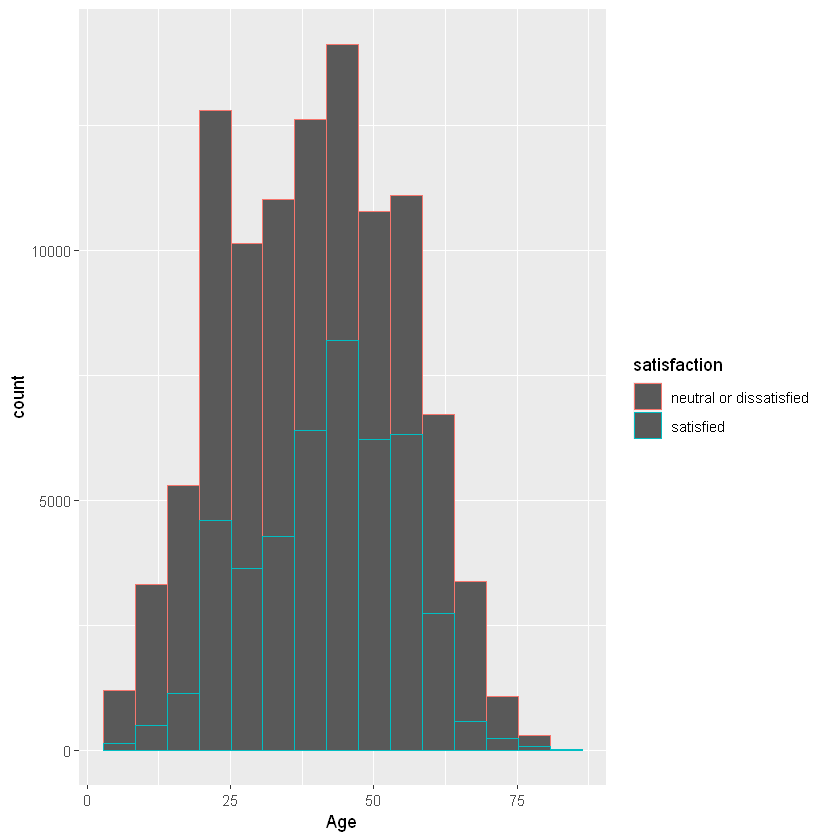

In [14]:
# histogram of Age differenciated using satisfaction
ggplot(data = train, aes(x = Age, col = satisfaction)) + geom_histogram(bins = 15)

#### Insights :- 
The above graph shows the satisfaction level of airline experience based on the passenger's age. There are more number of people travelling in the airline in the age category of 25 - 50 years. In that very less percentage of the people are actually satisfied.

### Customer Satisfaction Compared To Customer Type

Gathering Info Regarding The Graph

In [15]:
# to print the unique values in each column
unique(train$Customer.Type)
unique(train$satisfaction)

[1] Loyal Customer    disloyal Customer
Levels: disloyal Customer Loyal Customer

[1] neutral or dissatisfied satisfied              
Levels: neutral or dissatisfied satisfied

Creation Of Graph

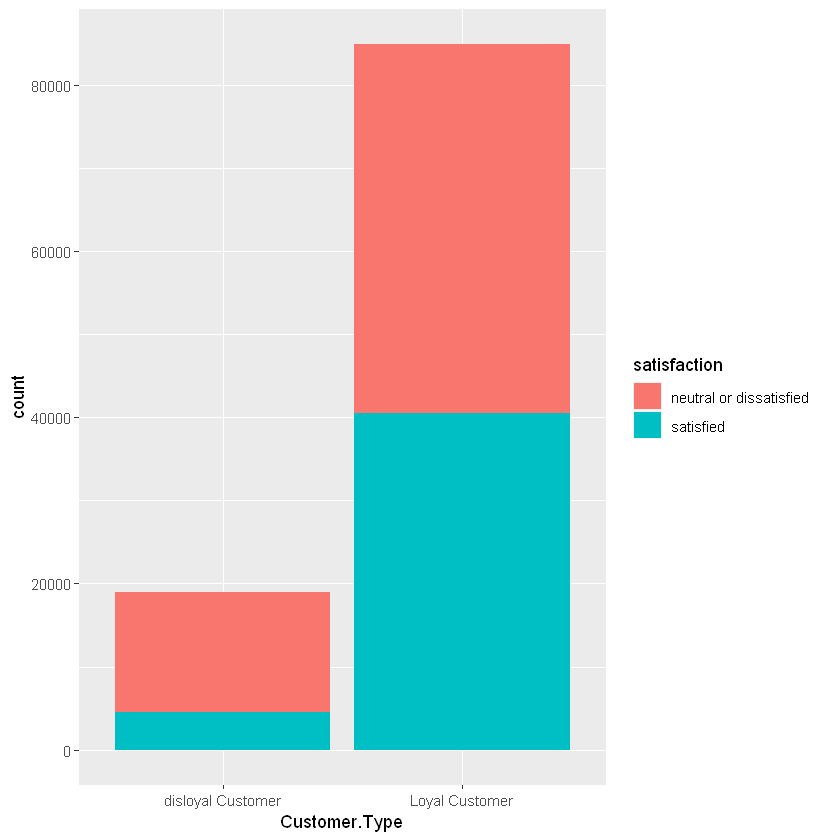

In [20]:
# histogram of satisfaction of customer based on the type of customer
ggplot(data = train, aes(x = Customer.Type, fill = satisfaction)) + geom_bar()

#### Insights :- 
The above graph shows the satisfaction level of airline experience based on the type of passenger. There are more number of Loyal pasengers comparitively and in general there are more number of people who are dissatisfied or neutral.

## ML Algorithm For Prediction

Creation of Logistic Model

In [17]:
# logistic model created
logistic <- glm(data = train, 
             satisfaction ~ Customer.Type 
             + Type.of.Travel 
             + Class
             + Flight.Distance
             + Departure.Arrival.time.convenient
             + Ease.of.Online.booking
             + Online.boarding
             + Baggage.handling
             + Departure.Delay.in.Minutes
             + Arrival.Delay.in.Minutes, 
             family = "binomial") # family is binomial as output has only two values (satisfied or neutral/dissatisfied)

summary(logistic) # all mathematical calculations about the model


Call:
glm(formula = satisfaction ~ Customer.Type + Type.of.Travel + 
    Class + Flight.Distance + Departure.Arrival.time.convenient + 
    Ease.of.Online.booking + Online.boarding + Baggage.handling + 
    Departure.Delay.in.Minutes + Arrival.Delay.in.Minutes, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4360  -0.3995  -0.0905   0.3224   4.1826  

Coefficients:
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         4.069e-01  7.619e-02   5.340 9.29e-08 ***
Customer.TypeLoyal Customer         2.332e+00  3.363e-02  69.346  < 2e-16 ***
Type.of.TravelPersonal Travel      -3.380e+00  3.651e-02 -92.565  < 2e-16 ***
ClassEco                           -6.767e-01  2.715e-02 -24.928  < 2e-16 ***
ClassEco Plus                      -8.544e-01  4.366e-02 -19.570  < 2e-16 ***
Flight.Distance                     3.653e-05  1.199e-05   3.046  0.00232 ** 
Departure.Arrival.time

Predicting For Test Dataset

In [18]:
# prediction of satisfaction of the passengers of test dataset
pred <- predict(logistic, newData = test, type = "response")

Accuracy Testing

In [19]:
y_pred <- ifelse(pred > 0.5, "satisfied", "neutral or dissatisfied") # classifying as the two values
y_act <- test$satisfaction

accuracy.rate <- round(mean(y_pred == y_act) * 100, 2) # calculation of percentage of accuracy
print(paste("Accuracy Rate of Prediction: ", accuracy.rate, "%", sep = ''))

[1] "Accuracy Rate of Prediction: 51.02%"


A logistic model has been created with which prediction for the test dataset has been taken. Now we have calculated the accuracy of the model by comparing the predicted value with the actual value. We saw that our model had 51.02% accuracy rate.

#### Conclusion :- 
Our project has helped us in understanding what is present in a general passenger feedback form and how satisfied the passengers are. We first explored the dataset, and did prediction if the passenger is satisfied or not.

#### Future Scope :- 
As we can see the accuracy level for this model is 51.02%, hence to increase the accuracy we can use multiple algorithms and do tuning to the algorithms or we can go for assemble methods.

#### References :- 
https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction